In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db, table_name))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
# 
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [7]:
# Identify percentage of null values in each column.
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [8]:
filling_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria',
             'GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']
country_list = df.Country.unique()

for country in country_list:
    df.loc[df['Country'] == country,filling_list] = df.loc[df['Country'] == country,filling_list].interpolate()
    
# Drop remaining null values after interpolation.
df.dropna(inplace=True)

To fix the missing data I used the interpolate function since the variance is high in some data categories.

In [9]:
# Check for null values.
df.isnull().sum()*100/df.isnull().count()

Country                     0.0
Year                        0.0
Status                      0.0
Life_Expectancy             0.0
Adult_Mortality             0.0
Infant_Deaths               0.0
Alcohol                     0.0
Percentage_Exp              0.0
HepatitisB                  0.0
Measles                     0.0
BMI                         0.0
Under_Five_Deaths           0.0
Polio                       0.0
Tot_Exp                     0.0
Diphtheria                  0.0
HIV/AIDS                    0.0
GDP                         0.0
Population                  0.0
thinness_1to19_years        0.0
thinness_5to9_years         0.0
Income_Comp_Of_Resources    0.0
Schooling                   0.0
dtype: float64

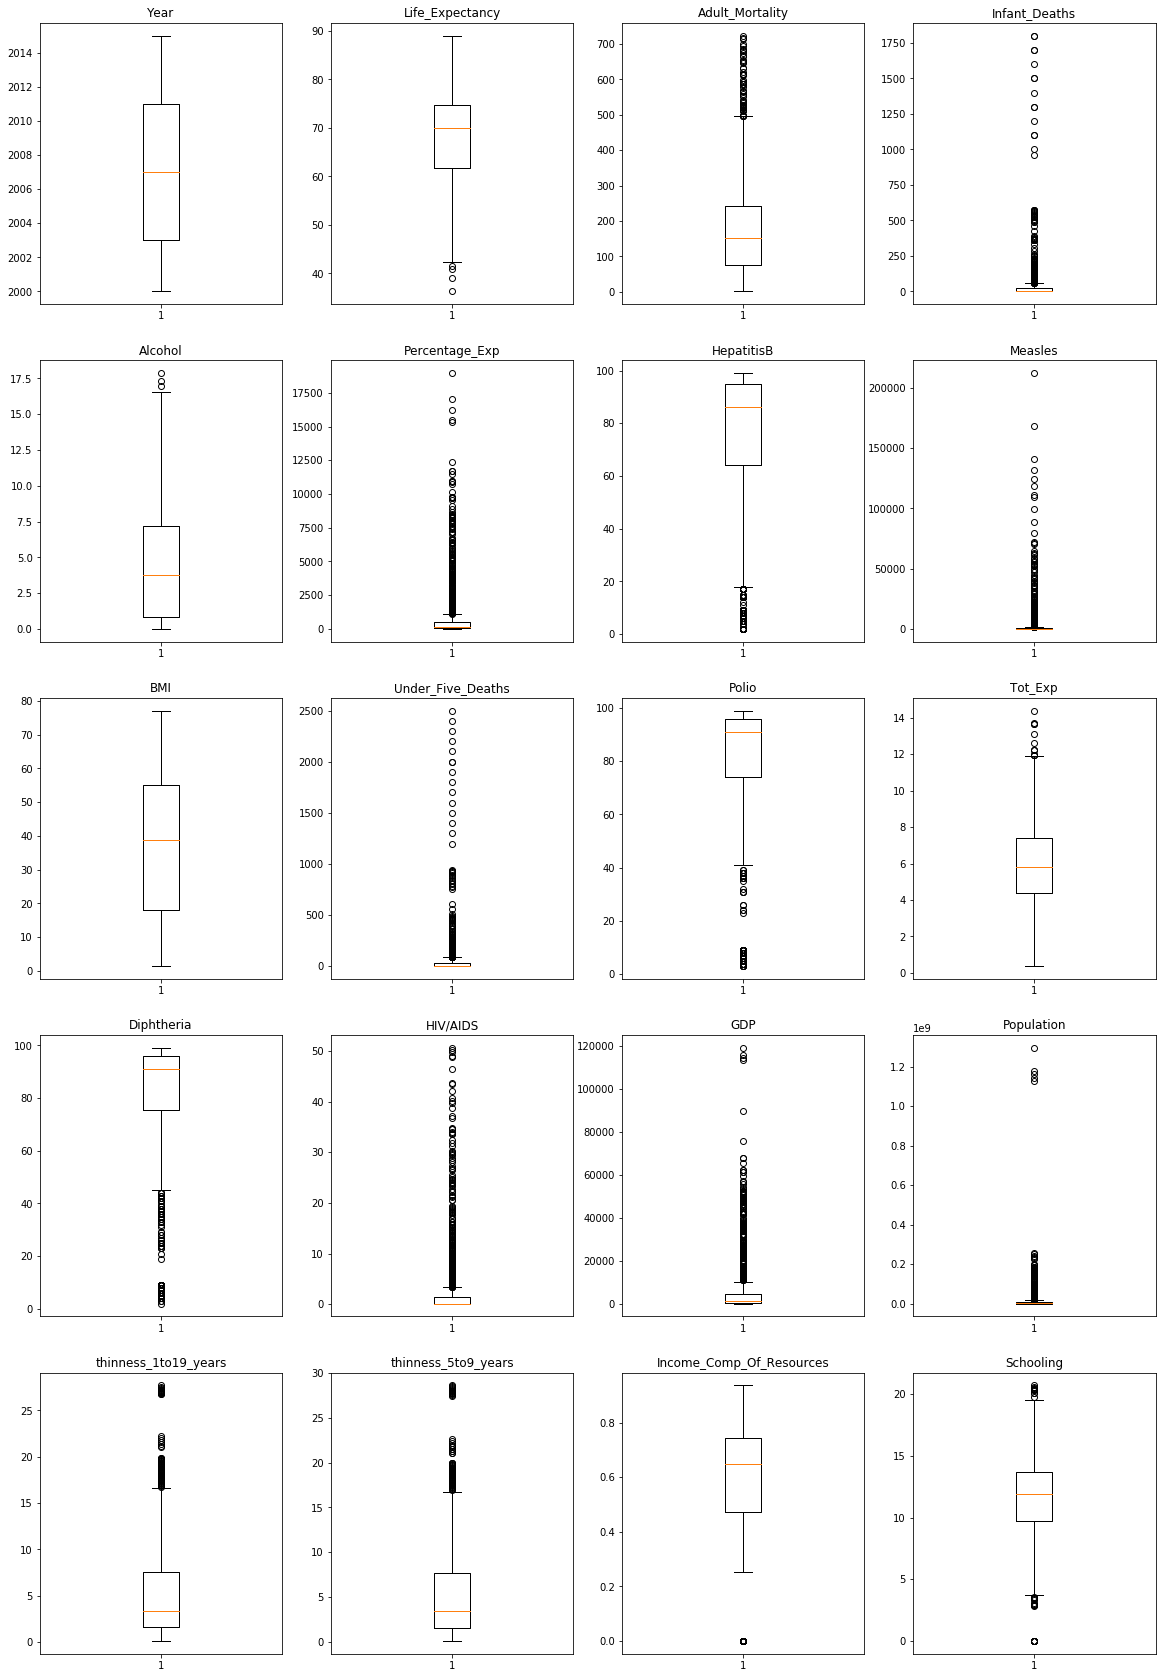

In [10]:
# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))
columns = df.select_dtypes(['int64', 'float64']).columns
for index, value in enumerate(columns):
                     plt.subplot(5,4,index+1)
                     plt.boxplot(df[value],whis=1.5)
                     plt.title(value)

plt.show()

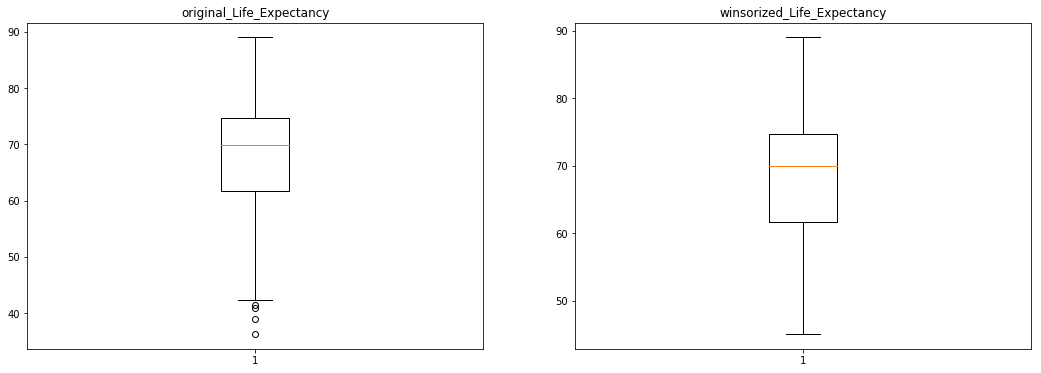

In [11]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

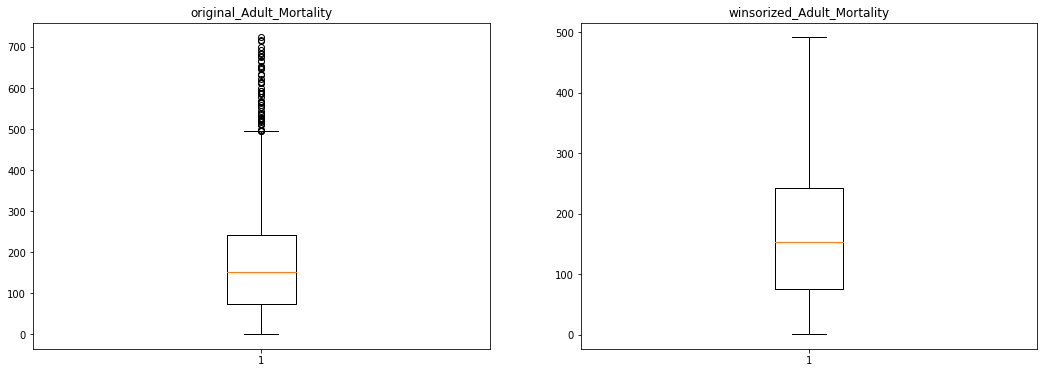

In [12]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

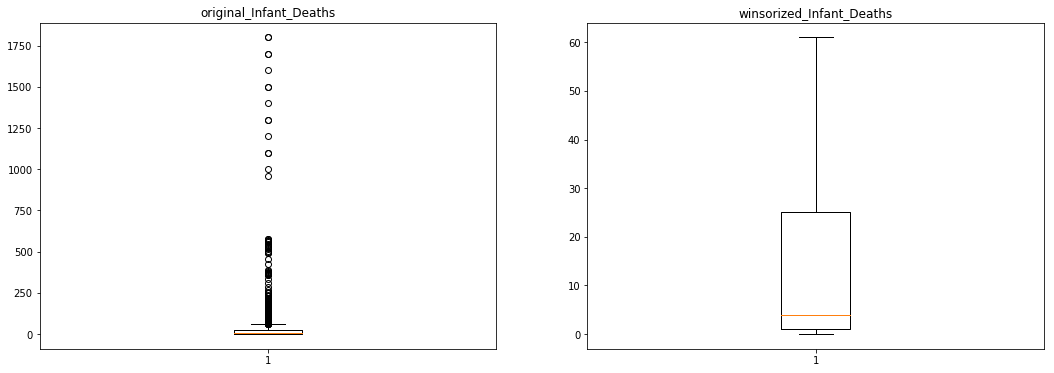

In [13]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

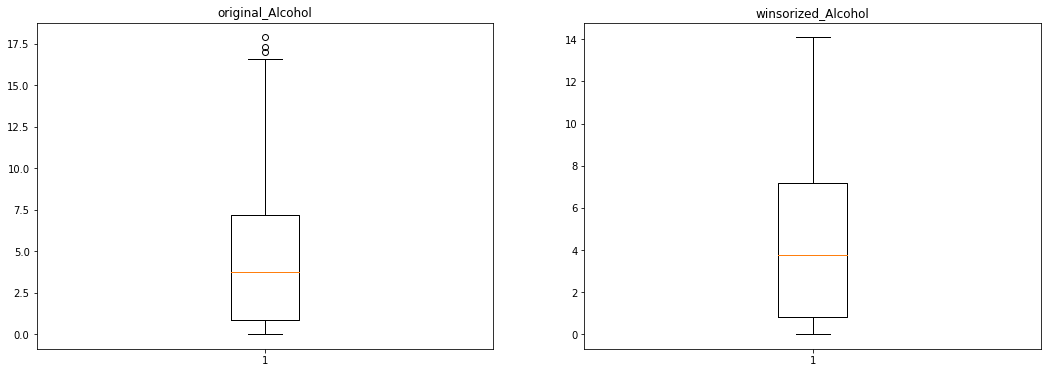

In [14]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

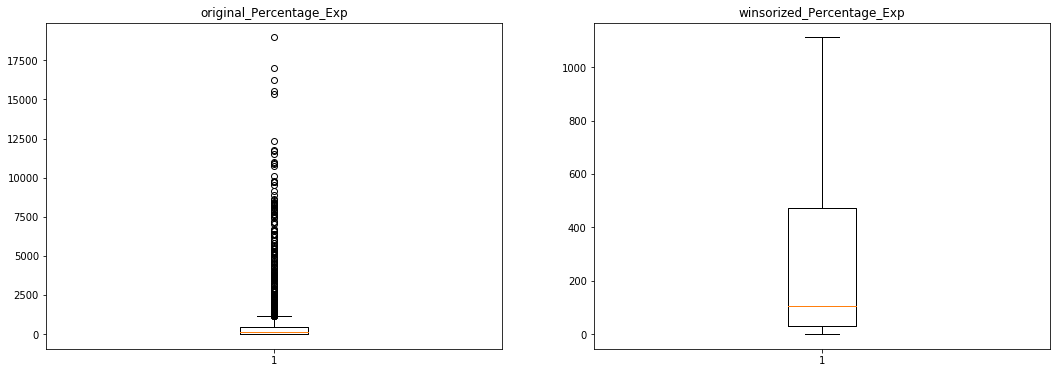

In [15]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

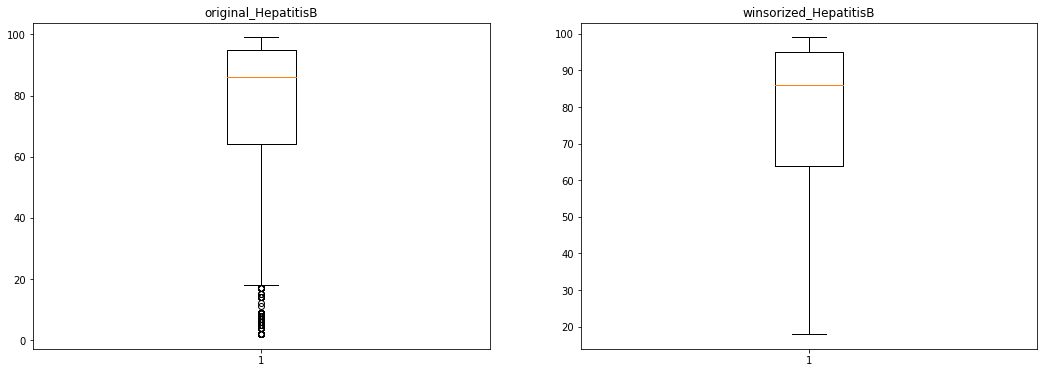

In [16]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

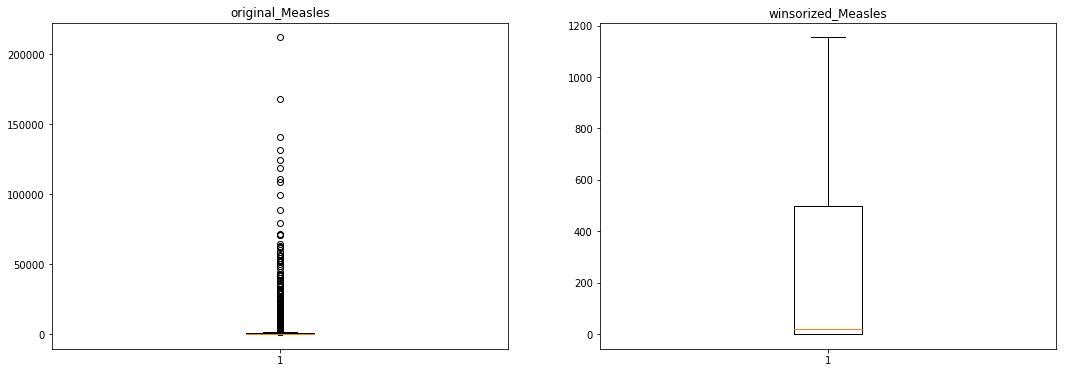

In [17]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [18]:
# Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

df = df.drop('Measles',axis=1)

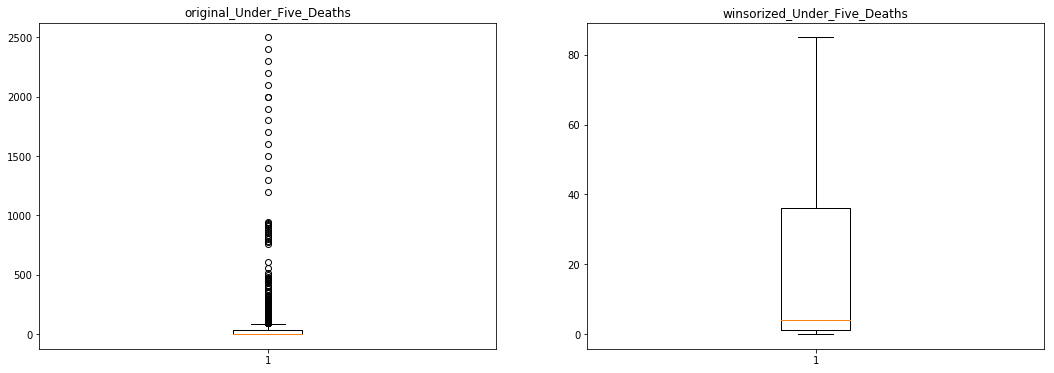

In [19]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

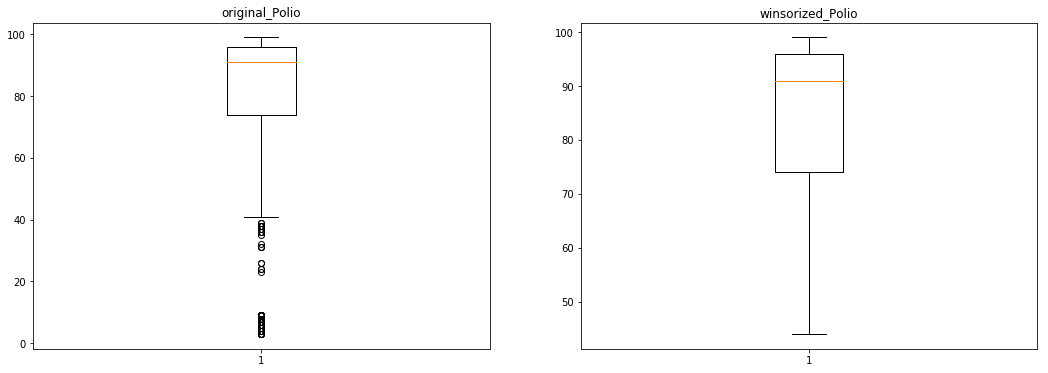

In [20]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

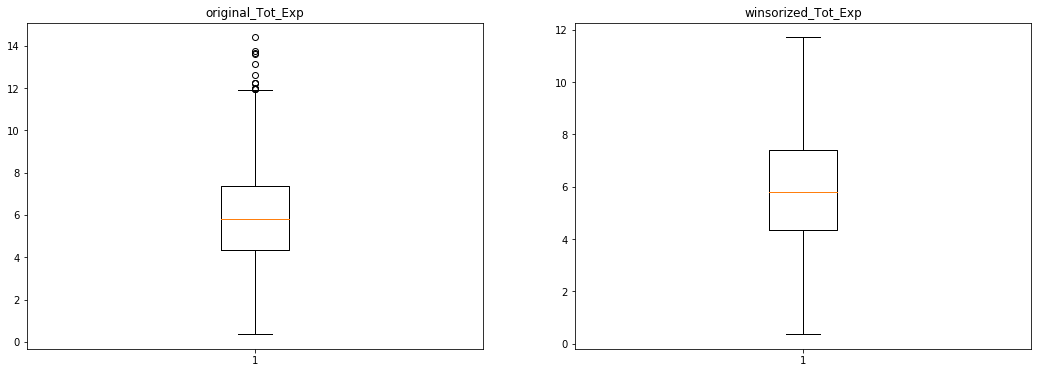

In [21]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

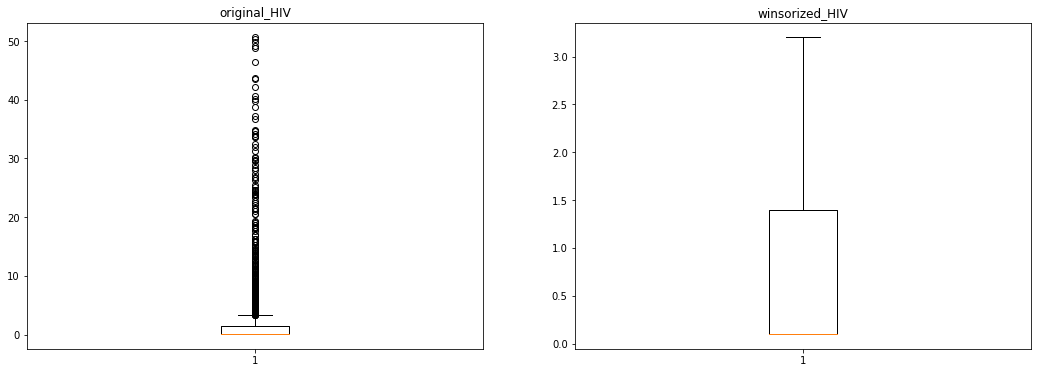

In [22]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

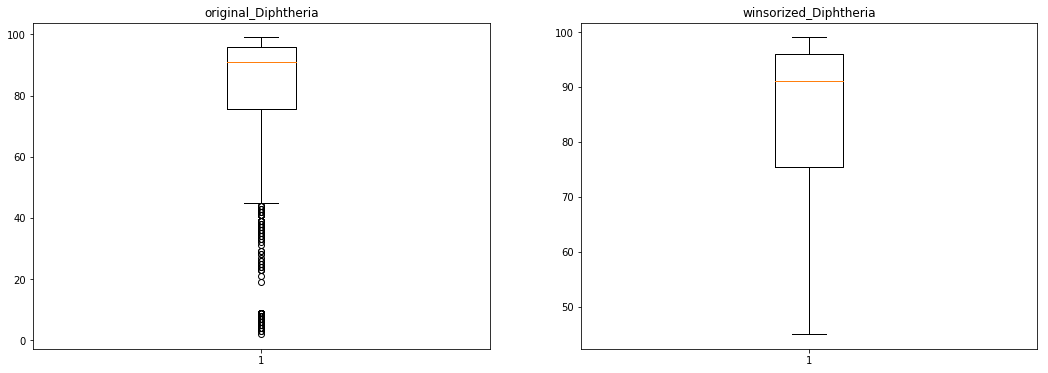

In [23]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

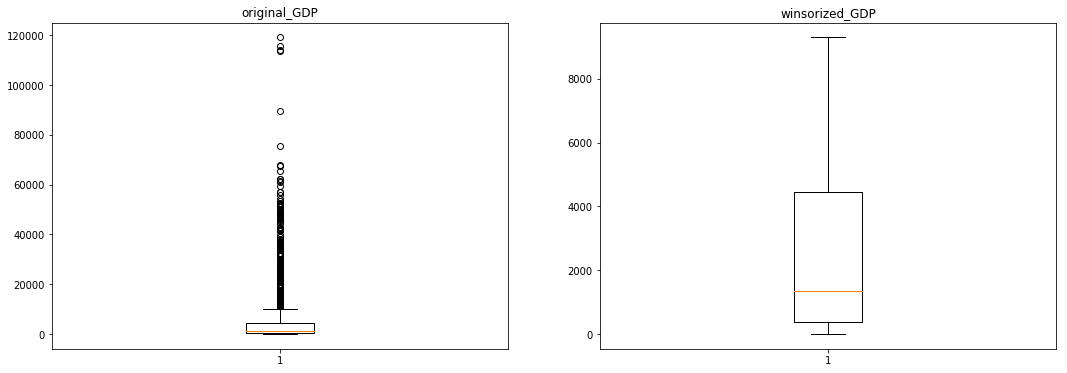

In [24]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

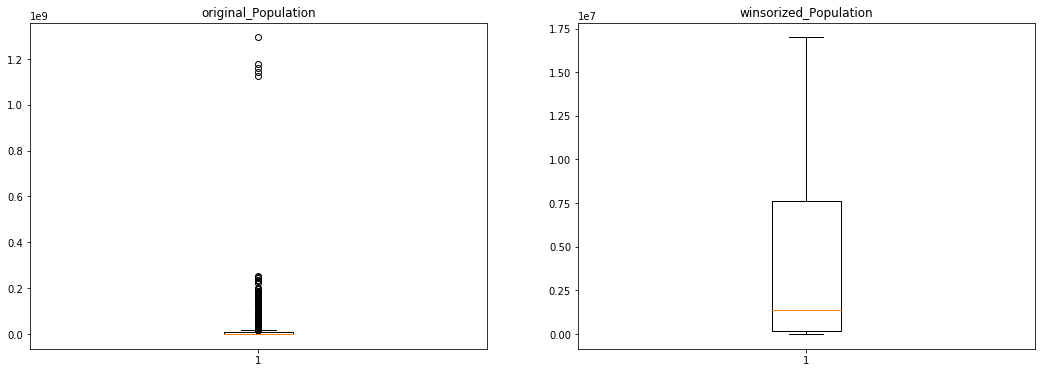

In [25]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

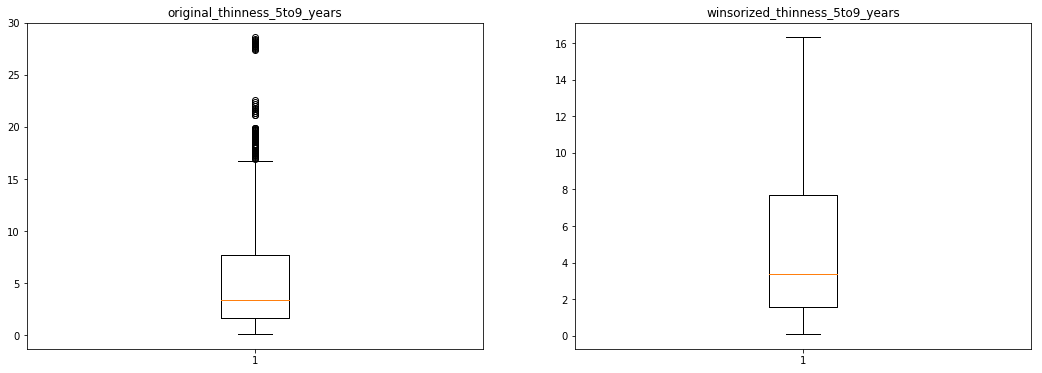

In [26]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

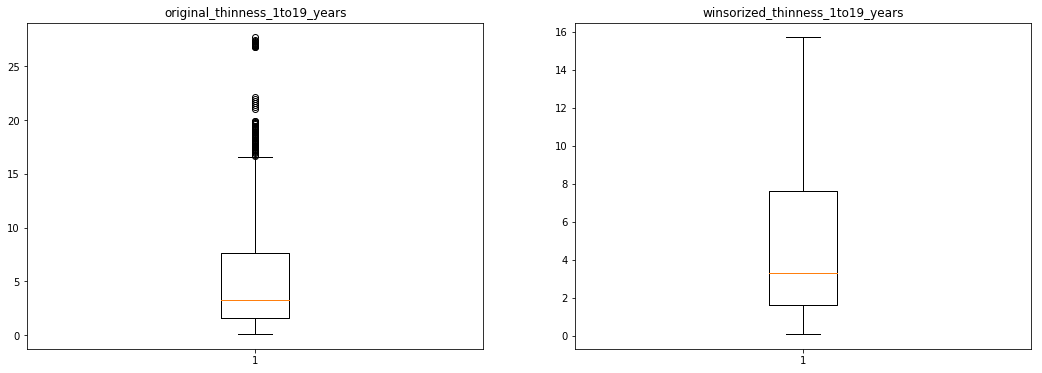

In [27]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

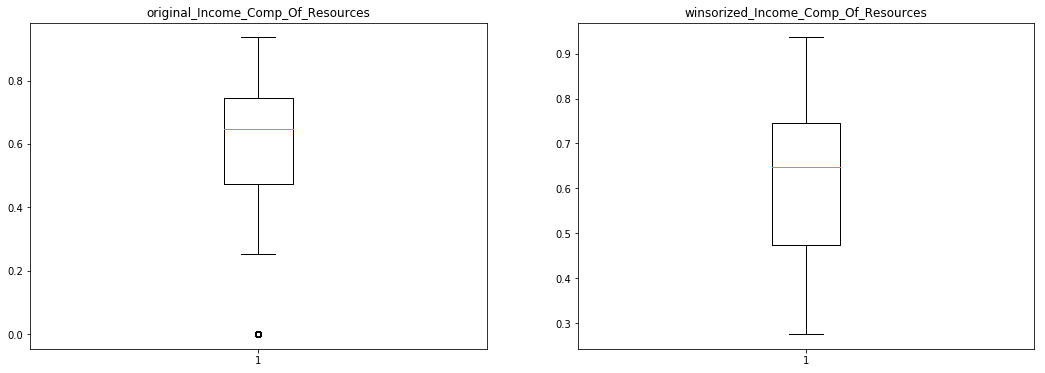

In [28]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

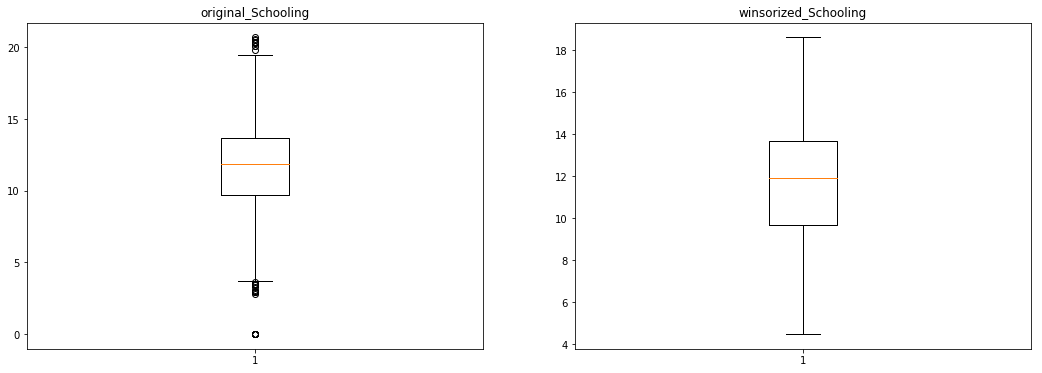

In [29]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [30]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    
    

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [31]:
# Adding winsorized variables to the data frame.
df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df['winsorized_Alcohol'] = winsorized_Alcohol
df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df['winsorized_HepatitisB'] = winsorized_HepatitisB
df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df['winsorized_Polio'] = winsorized_Polio
df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df['winsorized_Diphtheria'] = winsorized_Diphtheria
df['winsorized_HIV'] = winsorized_HIV
df['winsorized_GDP'] = winsorized_GDP
df['winsorized_Population'] = winsorized_Population
df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df['winsorized_Schooling'] = winsorized_Schooling


### Data Exploration

In [32]:
df.describe(include='all')

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1987,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Albania,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.984902,NaN,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,36.428636,...,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,NaN,4.323147,NaN,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,19.736138,...,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,1.400000,...,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,NaN,2003.000000,NaN,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,18.150000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,NaN,2007.000000,NaN,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,38.700000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,NaN,2011.000000,NaN,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,55.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000


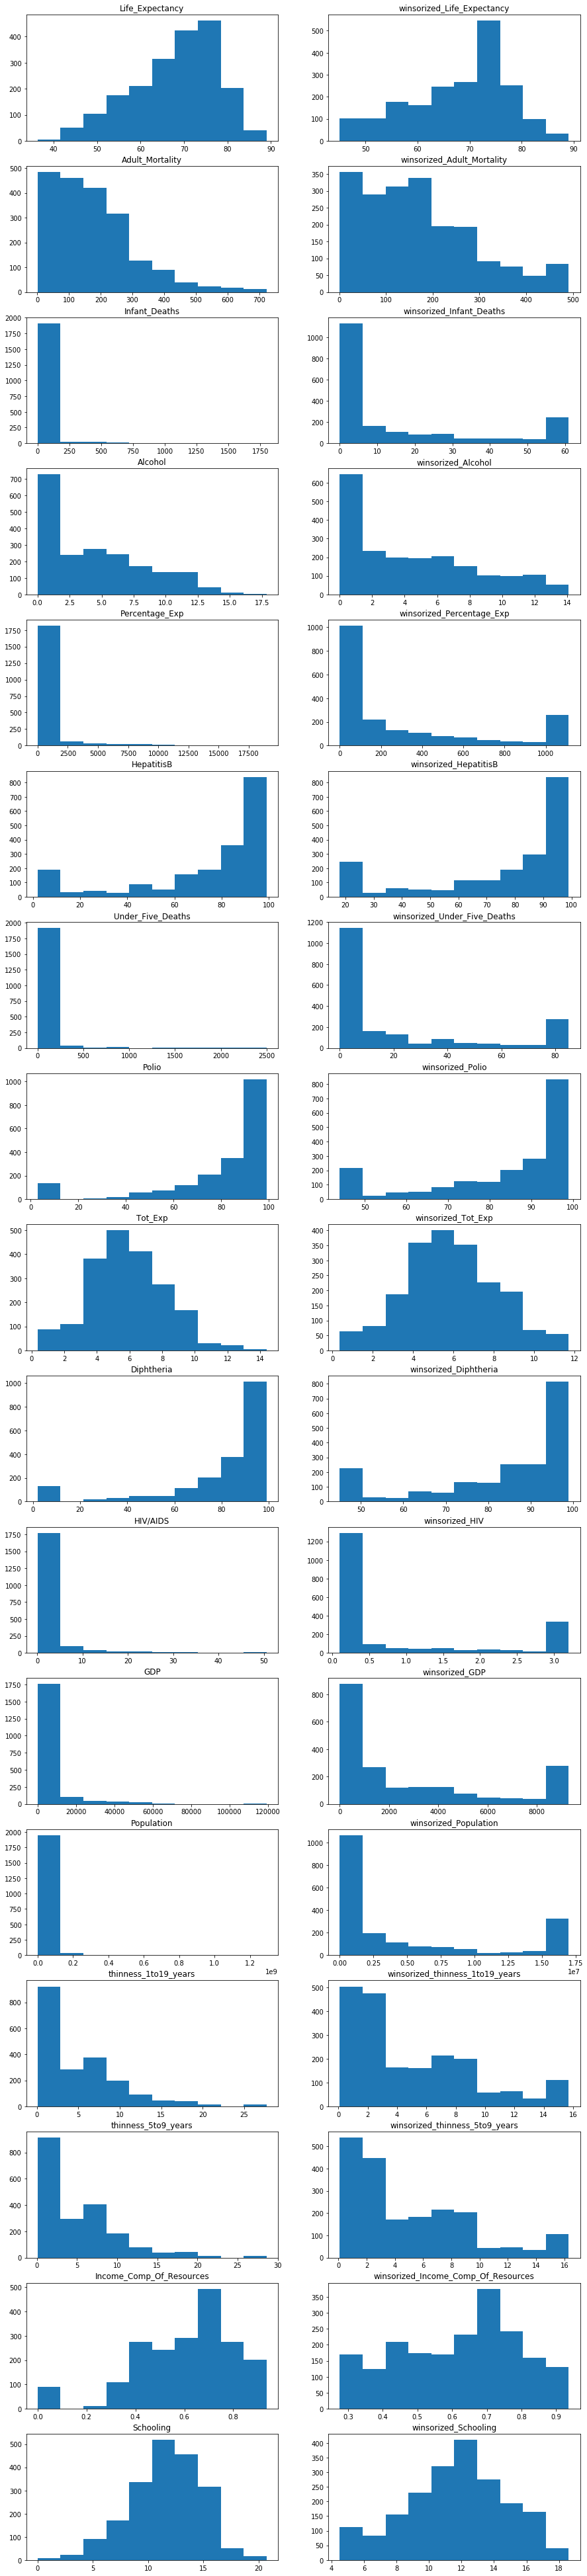

In [33]:
# new column
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

winsorized_Life_Expectancy, winsorized_Tot_Exp, winsorized_Schooling are some what normally distributed.

In [34]:
# Descriptive statistics of categorical variables.
df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


### Univariate visualization of categorical variables

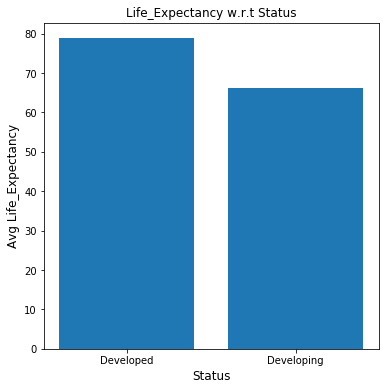

In [35]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

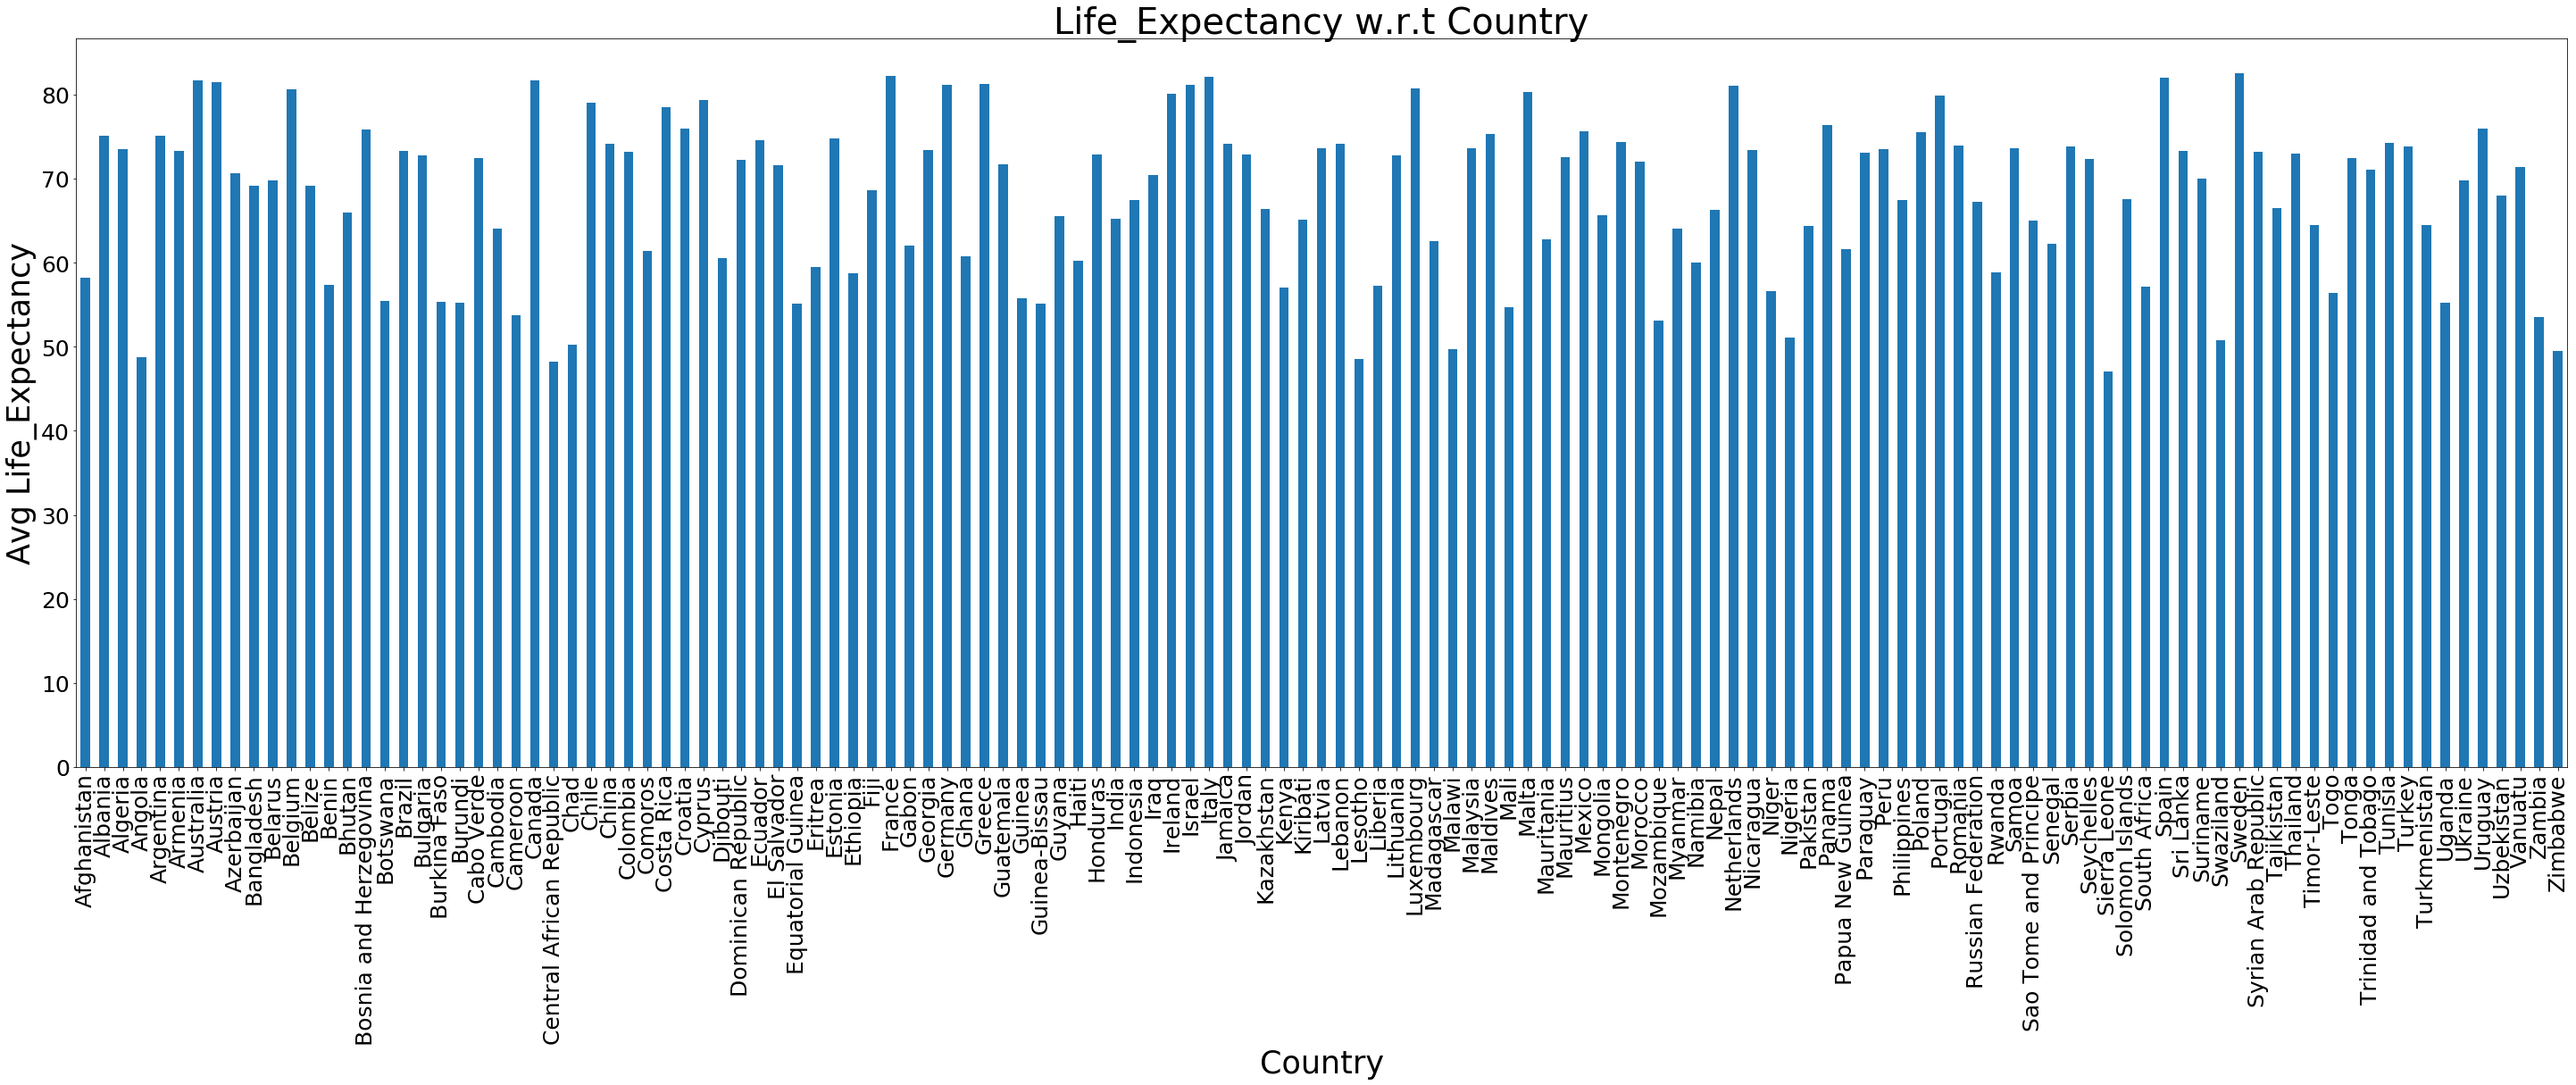

In [36]:
# Life_Expectancy w.r.t Country using bar plot.
df_country = df.groupby('Country')['winsorized_Life_Expectancy'].mean()
df_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

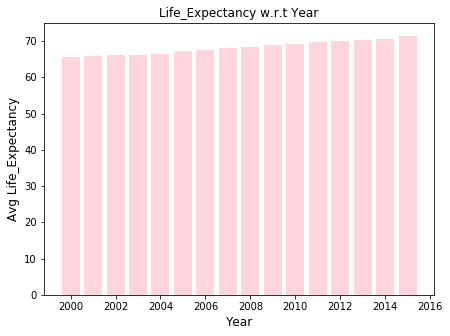

In [37]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

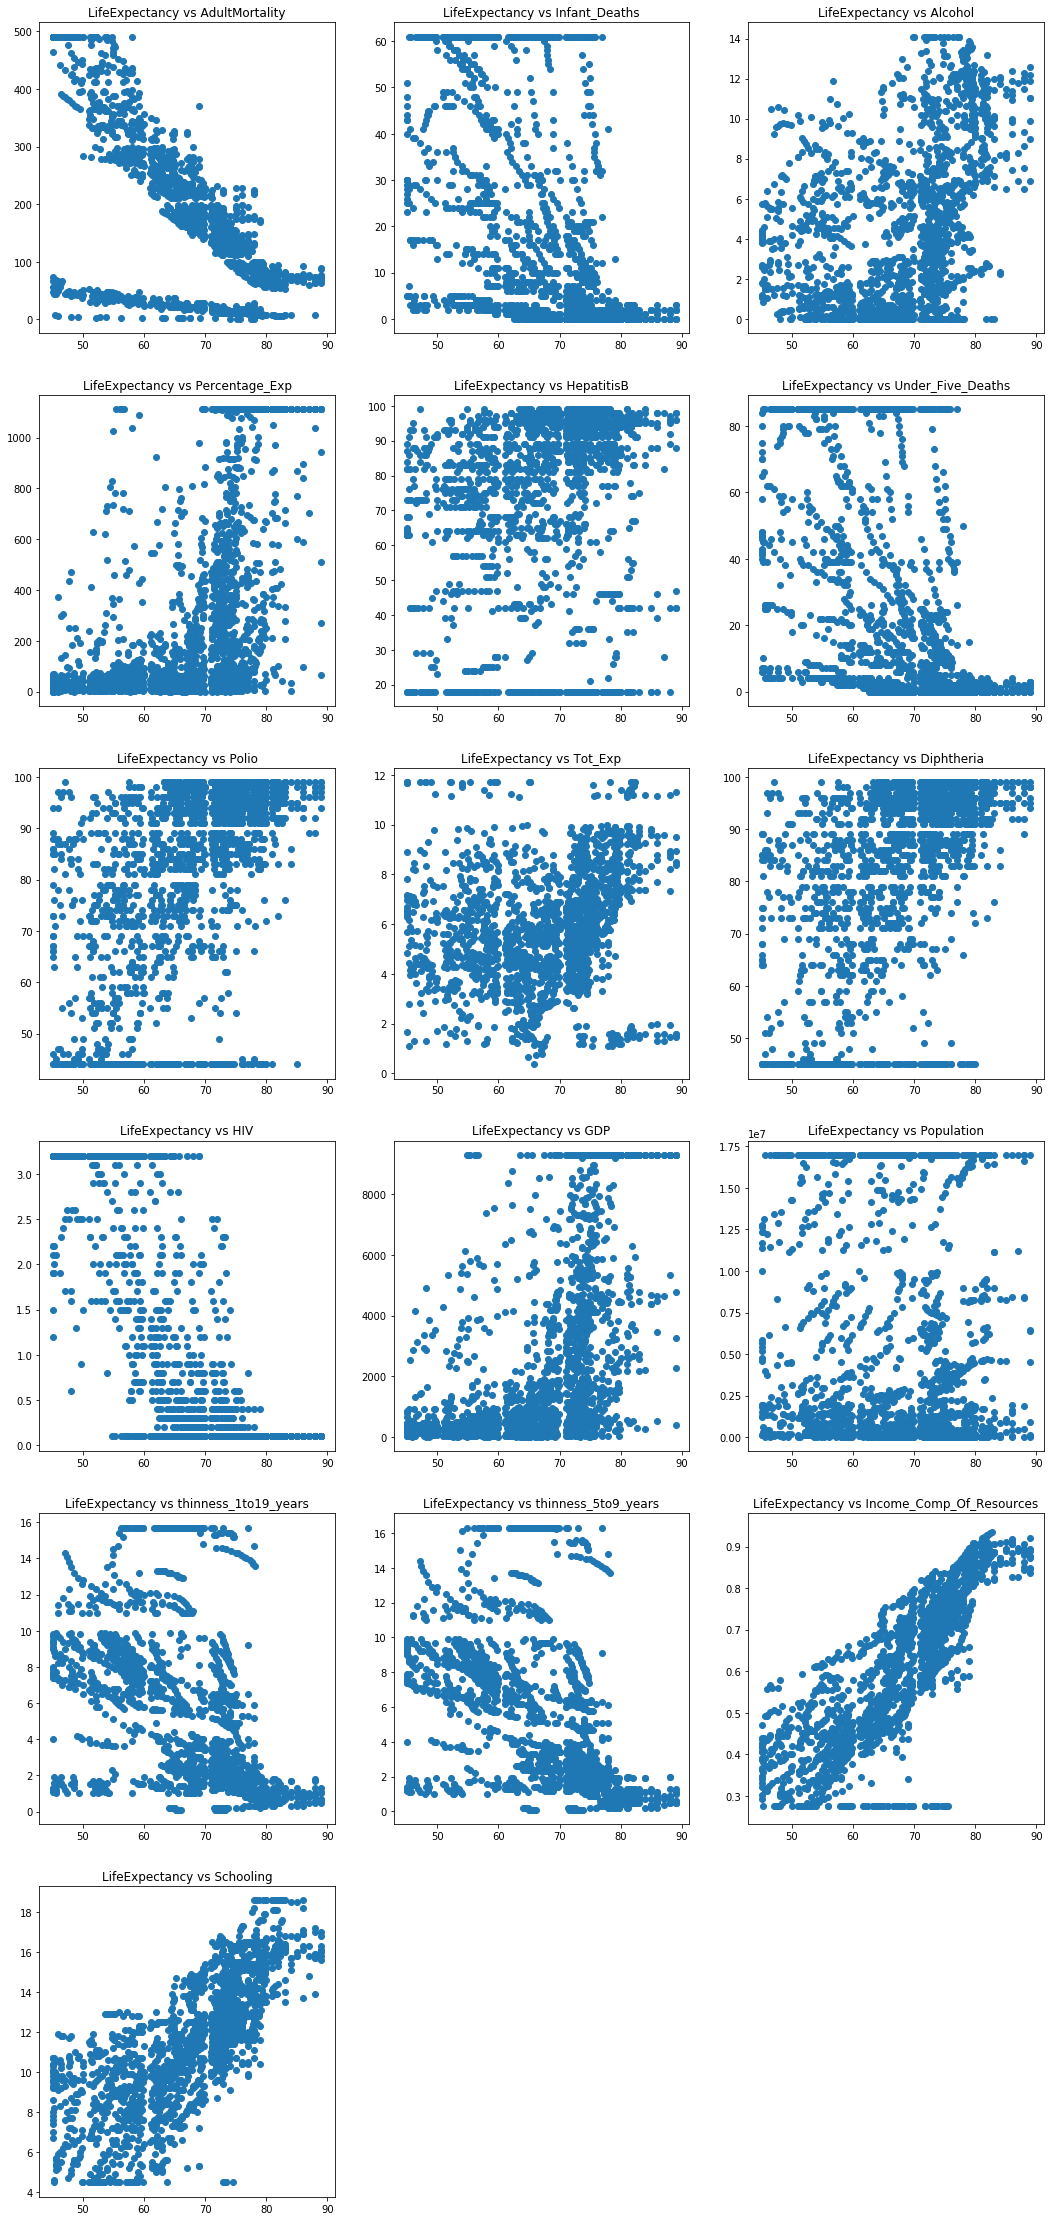

In [38]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variabdfs.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

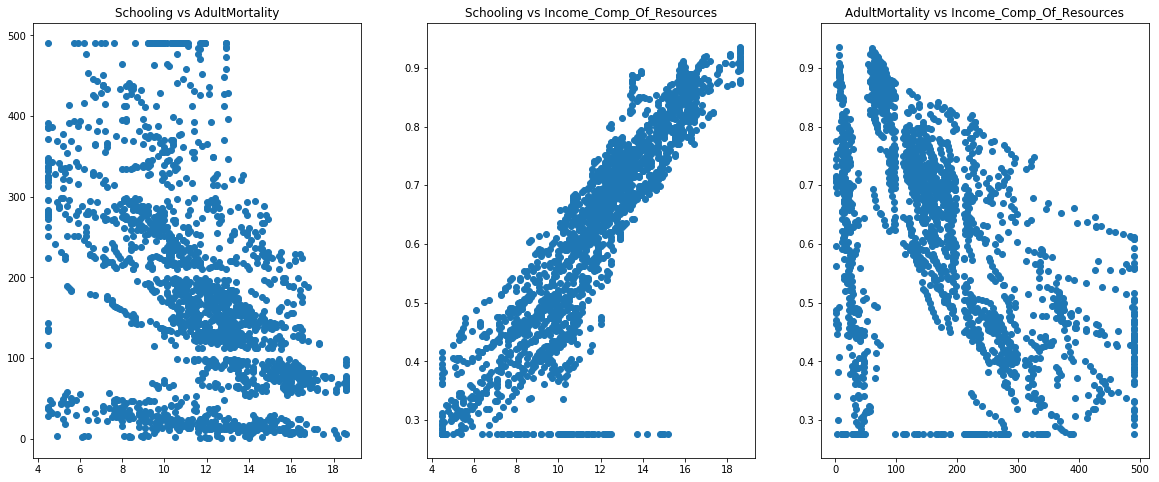

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df["winsorized_Adult_Mortality"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

Life_Expectancy has somewhat Negative relationship with AdultMortality.
Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.

Let us observe if there exists any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

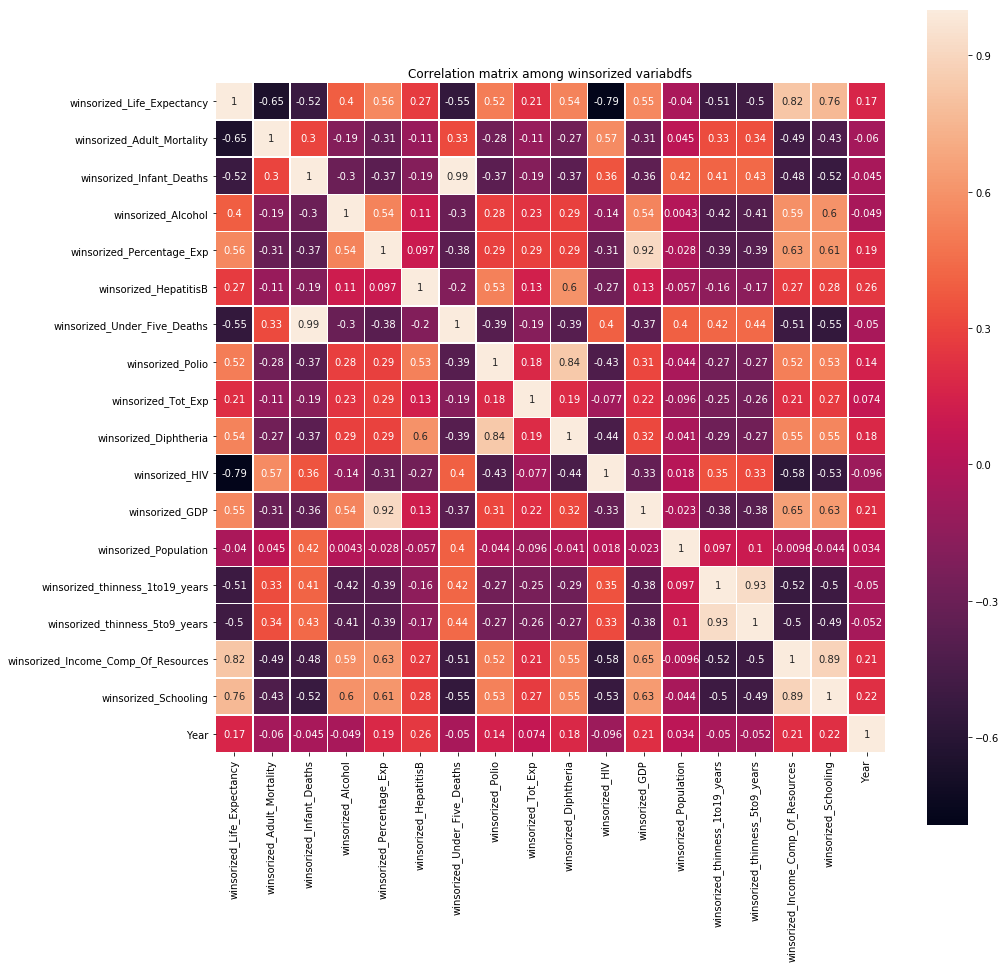

In [40]:
# Correlation of winsorized variables
df_win = df.iloc[:,21:]
df_win['Country'] = df['Country']
df_win['Year'] = df['Year']
df_win['Status'] = df['Status']
df_win_num = df_win.iloc[:,:-3]
cormat = df_win_num.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_win.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variabdfs")
plt.show()

winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.
winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated.
winsorized_Polio and winsorized_Diphtheria are correlated.
winsorized_Percentage_Exp and winsorized_GDP are correlated.
winsorized_Income_Comp_Of_Resources and winsorized_Life_Expectancy are correlated.
winsorized_Life_Expectancy and winsorized_Schooling are correlated.
winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated.
winsorized_HIV has negative relation with winsorized_Life_Expectancy.
winsorized_Adult_Mortality has negative relation with winsorized_Life_Expectancy.

###  Feature Engineering

In [41]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [42]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],
                df.loc[df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

p value is < 0.05

Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

From above heatmap we can derive that the following features has the most effect on our target:
1.  winsorized_Income_Comp_Of_Resources(Positive)
2. winsorized_Schooling(positive)
3. winsorized_HIV(Negetive)
4. winsorized_Adult_Mortality(negetive)

More important, we can see that winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. All the features should NOT be inter related and hence let us eliminate one of these based on the correlation
value w.r.t winsorized_Life_Expectancy.

Let us eliminate winsorized_Schooling as it has relatively low correlation factor. Also, we can choose 'Status' as an important feature based on the above analysis.

In [43]:
# Create a data frame with features.
feature_df = df[['winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV',
                 'winsorized_Adult_Mortality', 'Status']]

# Convert categorical values to numerical values using one-hot encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
feature_df.head()

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Status,Developing
0,65.0,0.479,0.1,263.0,Developing,1
1,59.9,0.476,0.1,271.0,Developing,1
2,59.9,0.470,0.1,268.0,Developing,1
3,59.5,0.463,0.1,272.0,Developing,1
4,59.2,0.454,0.1,275.0,Developing,1


So to create a model, I think these features might be the good features to start.